<h1><center>CUNY MSDS PythonMath Week 1 Assignment</center></h1> 



##Below are the source/output from 6 challenge assignments from *Doing Math with Python*, which is available in pdf format [here](http://index-of.es/Varios-2/Doing%20Math%20with%20Python.pdf)

### Most of the code was done without looking at the solutions **except** for chapters 4 and 7 which were too advanced for me at this time so that code is an exact copy of the solution.








Issues that I faced :
<ol>
<li> I didnt see how executing a Colab notebook could access a text file on my hard drive so I replaced the file load with a hardcoded list. (Points scored this year by the Kansas City Chiefs)
<li> I read many articles about converting a Colab notebook to html and none of them worked. Finally, I just clicked on the web page and saved as html
</ol>

<center><u>Chapter 1 Even Odd Vending Machine</u></center>




In [4]:
"""
Try writing an “even-odd vending machine,” which will take a number as
input and do two things:
     1.   Print whether the number is even or odd.
     2.   Display the number followed by the next 9 even or odd numbers.
    
"""



def even_odd_vending_machine(x):
    if (x%2==0):
        print("even\t", end=' ')
    else:
        print("odd \t", end=' ')
    
    for i in range(10):
        print(x+i*2, end='\t')
    print()
        


for z in [3,53,6,1,11,10]:
    even_odd_vending_machine(z)
        
    



odd 	 3	5	7	9	11	13	15	17	19	21	
odd 	 53	55	57	59	61	63	65	67	69	71	
even	 6	8	10	12	14	16	18	20	22	24	
odd 	 1	3	5	7	9	11	13	15	17	19	
odd 	 11	13	15	17	19	21	23	25	27	29	
even	 10	12	14	16	18	20	22	24	26	28	


<center><u>Chapter 2 Graph of a Quadratic Function</u></center>

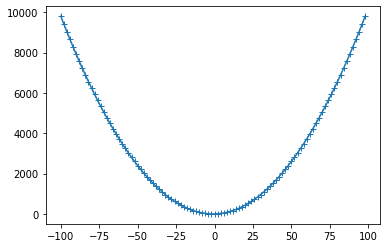

In [5]:
"""

Create a graph of the function f(x)=x**2 + 2*x + 1

Try using at least 10 values for x instead of the 6
above. Calculate the corresponding y values using the function and then
create a graph using these two sets of values.
Once you’ve created the graph, spend some time analyzing how the
value of y varies with respect to x. Is the variation linear or nonlinear?

"""

from pylab import plot, show


# create a series of 100 even #s
x_values = range(-100,100,2)
y_values = []

for x in x_values:
    y_values.append(x**2 + 2*x + 1)

    # the variation is exponential, not linear
plot(x_values, y_values, marker='+')
show()

<center><u>Chapter 3 Statisics Calculator</u></center>

In [6]:

 # #2: Statistics Calculator
# Implement a statistics calculator that takes a list of numbers in the file
# mydata.txt and then calculates and prints their mean, median, mode,
# variance, and standard deviation using the functions we wrote earlier in
# this chapter.


# Note the instructions say to use the functions from the book
#  but I will add the numpy/statistics methods to verify the results

import numpy
import statistics
from collections import Counter

def find_differences(numbers):
    # Find the mean
    mean = calculate_mean(numbers)
    # Find the differences from the mean
    diff = []
    for num in numbers:
        diff.append(num-mean)
    return diff


def calculate_variance(numbers):
    # Find the list of differences
    diff = find_differences(numbers)
    #Find the squared differences
    squared_diff = []
    for d in diff:
        squared_diff.append(d**2)
    
    # Find the variance
    sum_squared_diff = sum(squared_diff)
    variance = sum_squared_diff/len(numbers)
    return variance

def calculate_mode(numbers):
    c = Counter(numbers)
    mode = c.most_common(1)
    return mode[0][0]

def calculate_median (numbers):
        
    N = len(numbers)
    numbers.sort()
    m=0
        # Find the median
    if N % 2 == 0:

        # if N is even
        m1 = N/2
        m2 = (N/2) + 1

        # Convert to integer, match position
        m1 = int(m1) - 1
        m2 = int(m2) - 1
        median = (numbers[m1] + numbers[m2])/2
    else:
        m = (N+1)/2
        
        # Convert to integer, match position
        m = int(m) - 1
        median = numbers[m]
        
   
    return median
      
def calculate_mean(numbers):
    s = sum(numbers)
    N = len(numbers)
    # Calculate the mean
    mean = s/N
    return mean


# infile = open("C:\_InProgress\Work\Math\CUNY\PythonMath\Top100_RunningBacks.txt")

# allnumbs = infile.readlines()

# dont think google colab supports reading my text file
num_list=[34,23,34,26,32,26,43,35,33,35,27,22,33]

# for line in allnumbs: 
#    num_list.append(int(line.strip()))
   
    
print("The calculate_median is ",calculate_median(num_list))
print("The mumpy median is ",numpy.median(num_list))

print("The calculate_mean is ",calculate_mean(num_list).__int__())
print("The numpy mean    is ",numpy.mean(num_list).__int__())

print("The calculate_mode is ",calculate_mode(num_list))
try:
  print("The statistics mode    is ", statistics.mode(num_list))
except statistics.StatisticsError:
  print("The statistics.mode does not handle multiple modes")
  

print("The calculate_variance is ",calculate_variance(num_list).__int__())
print("The statistics variance    is ",statistics.variance(num_list).__int__())

    # interesting way to calculate square root
print("The std deviation is ", (calculate_variance(num_list) ** .5).__int__() )













The calculate_median is  33
The mumpy median is  33.0
The calculate_mean is  31
The numpy mean    is  31
The calculate_mode is  26
The statistics.mode does not handle multiple modes
The calculate_variance is  31
The statistics variance    is  34
The std deviation is  5


<center><u>Chapter 4 Solving Univariate Inequalities</u></center>

In [7]:
"""

The challenge is (1) to create a function, isolve(), that
will take any inequality and (2) to choose one of the appropriate functions
discussed in this section to solve it and return the solution

NOTE: I didnt code this. I copied it and reviewed it and tested it.

"""

from sympy import Symbol, sympify, SympifyError
from sympy import solve_poly_inequality, solve_rational_inequalities, solve_univariate_inequality, Poly
from sympy.core.relational import Relational, Equality

def isolve(ineq_obj):
    x = Symbol('x')

    expr = ineq_obj.lhs
    rel = ineq_obj.rel_op
    
    if expr.is_polynomial():
        p = Poly(expr, x)
        return solve_poly_inequality(p, rel)
    elif expr.is_rational_function():
        p1, p2 = expr.as_numer_denom()
        num  = Poly(p1)
        denom = Poly(p2)
        return solve_rational_inequalities([[((num, denom), rel)]])
    else:
        return solve_univariate_inequality(ineq_obj , x, relational=False)

if __name__ == '__main__':
    ineq = input('Enter the inequality to solve: ')
    try:
        ineq_obj = sympify(ineq)
    except SympifyError:
        print('Invalid inequality')
    else:
        # We check if the input expression is an inequality here
        if isinstance(ineq_obj, Relational) and not isinstance(ineq_obj, Equality):
            print(isolve(ineq_obj))
        else:
            print('Invalid inequality')

Enter the inequality to solve: 3*x**2 - 45x < 12
Invalid inequality


<center><u>Law of Large Numbers</u></center>

In [8]:
"""
Simulate x number of dice rolls to see how close
they are to the expected value of a dice roll (3.5)

@author: arono

"""
import random

def calc_dice_roll_average(dice_rolls):
    rolls = []
    for t in range(dice_rolls):
        rolls.append(random.randint(1, 6))
    return sum(rolls)/dice_rolls

trials=[100, 1000, 10000, 100000, 500000]

for t in trials:
    print("The average roll from \t", t, "\t tosses is ", calc_dice_roll_average(100))
    

The average roll from 	 100 	 tosses is  3.61
The average roll from 	 1000 	 tosses is  3.9
The average roll from 	 10000 	 tosses is  3.43
The average roll from 	 100000 	 tosses is  3.61
The average roll from 	 500000 	 tosses is  3.82


** Here is the Expected Value formulat formatted in Latex

$$ \mathbf{E} = x_1P(x_1) + x_2P(x_2) ... + x_nP(x_n) $$

<center><u>Chapter 7 Implement the Gradient Descent</u></center>

Enter a function in one variable: x**2 - 9
Enter the variable to differentiate with respect to: x
Enter the initial value of the variable: 1
x: 0.00499893759237415
Minimum value: -8.99997501062295


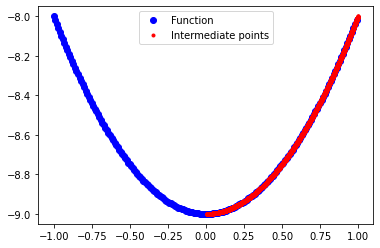

In [9]:

"""

The challenge is to implement a generic program using the gradient
descent algorithm to find the minimum value of a single-variable function
specified as input by the user. The program should also create a graph
of the function and show all the intermediate values it found before finding
the minimum.

Example:
    Enter a function in one variable: x**2 - 9
    Enter the variable to differentiate with respect to: x
    Enter the initial value of the variable: 1

x: 0.00499893759237415
Minimum value: -8.99997501062295

"""


from sympy import Derivative, Symbol, sympify, solve
import matplotlib.pyplot as plt

def grad_descent(x0, f1x, x):
    # check if f1x=0 has a solution
    if not solve(f1x):
        print('Cannot continue, solution for {0}=0 does not exist'.format(f1x))
        return None
    epsilon =  1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x_old - step_size*f1x.subs({x:x_old}).evalf()

    # list to store the X values traversed
    X_traversed = []
    while abs(x_old - x_new) > epsilon:
        X_traversed.append(x_new)
        x_old = x_new
        x_new = x_old-step_size*f1x.subs({x:x_old}).evalf()

    return x_new, X_traversed

def frange(start, final, interval):

    numbers = []
    while start < final:
        numbers.append(start)
        start = start + interval
    
    return numbers

def create_plot(X_traversed, f, var):
    # First create the graph of the function itself
    x_val = frange(-1, 1, 0.01)
    f_val = [f.subs({var:x}) for x in x_val]
    plt.plot(x_val, f_val, 'bo')
    # calculate the function value at each of the intermediate
    # points traversed
    f_traversed = [f.subs({var:x}) for x in X_traversed]
    plt.plot(X_traversed, f_traversed, 'r.')
    plt.legend(['Function', 'Intermediate points'], loc='best')
    plt.show()

if __name__ == '__main__':

    f = input('Enter a function in one variable: ')
    var = input('Enter the variable to differentiate with respect to: ')
    var0 = float(input('Enter the initial value of the variable: '))
    try:
        f = sympify(f)
    except SympifyError:
        print('Invalid function entered')
    else:
        var = Symbol(var)
        d = Derivative(f, var).doit()
        var_min, X_traversed = grad_descent(var0, d, var)
        if var_min:
            print('{0}: {1}'.format(var.name, var_min))
            print('Minimum value: {0}'.format(f.subs({var:var_min})))
            create_plot(X_traversed, f, var)


